# Import packages

In [1]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from scipy import stats
import numpy as np
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load data

In [2]:
fs1 = pd.read_csv('FS1.txt', sep='\t', header=None)
print(f"fs1 shape = {fs1.shape}")
display(fs1.head())

fs1.describe()

fs1 shape = (2205, 600)


,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,8.990,0.770,0.641,0.006,0.000,0.000,0.001,0.003,0.001,0.001,...,7.743,7.992,7.919,7.773,7.955,7.823,7.963,7.876,7.738,8.036
1,8.919,0.815,0.709,0.009,0.004,0.000,0.001,0.000,0.000,0.001,...,7.831,8.003,7.923,7.745,7.867,7.747,7.969,7.969,7.963,7.890
2,9.179,0.683,0.528,0.008,0.003,0.001,0.003,0.003,0.004,0.006,...,7.862,7.815,7.894,7.743,7.936,7.770,7.982,7.873,7.898,7.952
3,9.034,0.728,0.595,0.009,0.001,0.004,0.003,0.003,0.003,0.001,...,7.631,7.949,7.773,8.054,7.827,8.011,7.919,7.938,7.877,7.773
4,8.729,0.705,0.446,0.014,0.007,0.003,0.001,0.003,0.001,0.000,...,7.771,7.936,7.919,7.946,7.804,7.983,7.838,7.882,7.894,7.825


,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,8.287100,0.857298,0.563584,0.031154,0.003567,0.002926,0.002683,0.002458,0.002436,0.002311,...,7.638567,7.638928,7.642123,7.641907,7.638804,7.643067,7.637415,7.645035,7.638999,7.637983
std,0.480969,0.125100,0.152903,0.039403,0.002810,0.002540,0.002501,0.002410,0.002451,0.002378,...,0.530204,0.529731,0.530209,0.530325,0.529648,0.530317,0.529648,0.530884,0.530817,0.529553
min,7.033000,0.522000,0.309000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.106000,1.117000,1.119000,1.123000,1.109000,1.111000,1.118000,1.120000,1.124000,1.120000
25%,7.961000,0.773000,0.445000,0.009000,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,...,7.514000,7.515000,7.518000,7.515000,7.519000,7.518000,7.513000,7.525000,7.510000,7.519000
50%,8.278000,0.855000,0.531000,0.016000,0.003000,0.003000,0.003000,0.001000,0.001000,0.001000,...,7.712000,7.709000,7.711000,7.714000,7.706000,7.714000,7.707000,7.713000,7.710000,7.708000
75%,8.610000,0.944000,0.656000,0.036000,0.005000,0.004000,0.004000,0.004000,0.004000,0.004000,...,7.815000,7.815000,7.818000,7.823000,7.813000,7.820000,7.813000,7.821000,7.826000,7.815000
max,11.754000,1.488000,0.985000,0.298000,0.015000,0.013000,0.011000,0.011000,0.012000,0.012000,...,8.060000,8.078000,8.072000,8.064000,8.073000,8.080000,8.076000,8.083000,8.078000,8.087000


In [3]:
ps2 = pd.read_csv('PS2.txt', sep='\t', header=None)
print(f"ps2 shape = {ps2.shape}")
display(ps2.head())

ps2.describe()

ps2 shape = (2205, 6000)


,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,125.50,125.39,125.40,125.03,124.05,123.18,104.01,56.500,23.992,18.406,...,125.02,125.00,125.10,125.09,124.98,124.91,124.98,125.11,125.14,125.10
1,125.06,125.08,125.09,124.69,123.84,123.14,103.63,63.687,28.359,21.711,...,124.80,124.88,125.13,125.22,125.09,124.98,125.06,125.13,125.09,125.04
2,125.13,125.27,125.23,124.74,123.94,123.23,106.35,60.516,26.258,19.258,...,124.61,124.69,124.74,124.71,124.59,124.64,124.74,124.73,124.77,124.88
3,124.93,124.96,124.92,124.41,123.60,122.88,103.99,58.859,27.781,21.469,...,124.82,124.79,124.69,124.69,124.77,124.83,124.69,124.53,124.51,124.59
4,124.72,124.74,124.66,124.31,123.57,122.74,105.94,62.648,30.875,23.883,...,124.80,124.67,124.49,124.56,124.69,124.62,124.45,124.41,124.47,124.51


,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,123.362422,123.364358,123.339202,122.831868,121.808503,120.693455,104.294819,64.491438,35.220531,27.355589,...,123.359583,123.356580,123.355896,123.360023,123.361705,123.358848,123.358966,123.364444,123.364957,123.361741
std,3.701729,3.694412,3.700527,3.819922,3.746546,3.541433,9.616892,8.636717,3.792106,3.286553,...,3.701453,3.705096,3.702194,3.701239,3.698299,3.694301,3.700553,3.703952,3.700664,3.703531
min,119.610000,119.630000,118.920000,118.650000,115.830000,97.289000,27.031000,0.977000,1.133000,1.203000,...,119.140000,119.630000,119.680000,119.590000,119.690000,119.520000,119.650000,119.650000,119.600000,119.520000
25%,121.630000,121.670000,121.660000,120.560000,118.830000,117.690000,96.664000,58.883000,33.398000,25.523000,...,121.630000,121.650000,121.670000,121.660000,121.660000,121.670000,121.670000,121.650000,121.630000,121.630000
50%,123.040000,123.040000,123.010000,122.620000,122.060000,121.520000,105.080000,64.773000,35.180000,27.398000,...,123.040000,123.040000,123.060000,123.030000,123.030000,123.030000,123.020000,123.020000,123.020000,123.040000
75%,125.100000,125.100000,125.090000,124.830000,124.480000,124.270000,113.020000,71.297000,37.289000,29.266000,...,125.100000,125.120000,125.110000,125.120000,125.110000,125.090000,125.100000,125.110000,125.130000,125.110000
max,165.480000,165.260000,165.530000,165.690000,160.570000,125.220000,117.390000,79.102000,44.617000,35.398000,...,165.570000,165.730000,165.560000,165.350000,165.440000,165.430000,165.440000,165.630000,165.360000,165.340000


In [4]:
valve_condition = pd.read_csv("profile.txt", sep="\t", header=None, usecols=[1])[1]
print("valve vector", valve_condition.shape)
display(valve_condition.head())

display(valve_condition.describe())

print(Counter(valve_condition))


valve vector (2205,)


0    100
1    100
2    100
3    100
4    100
Name: 1, dtype: int64

count    2205.000000
mean       90.693878
std        10.681802
min        73.000000
25%        80.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: 1, dtype: float64

Counter({100: 1125, 73: 360, 80: 360, 90: 360})


# Visualize one time series for each class and feature

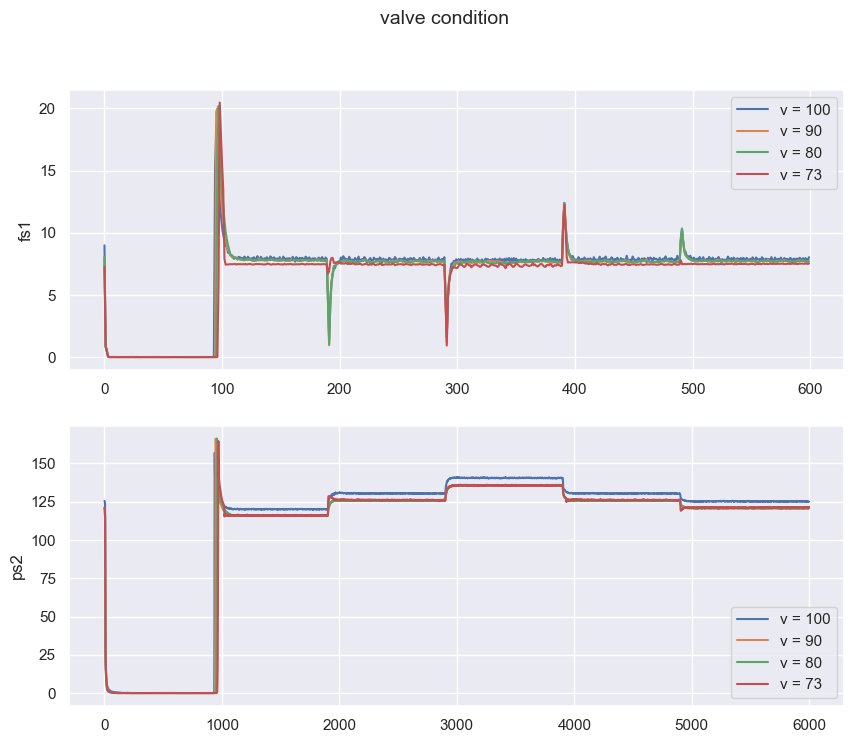

In [5]:
dfs = [fs1, ps2]
feature_names = ["fs1", "ps2"]

figure, axes = plt.subplots(2, 1, figsize=(10, 8))
figure.suptitle(f'valve condition', fontsize=14)

for ax, df, feature_name in zip(axes, dfs, feature_names):
    for profile_id in [0, 452, 443, 254]:
        ax.plot(df.loc[profile_id], label=f'v = {valve_condition[profile_id]}')
        ax.set_ylabel(feature_name)
        ax.legend(loc="best")
plt.show()

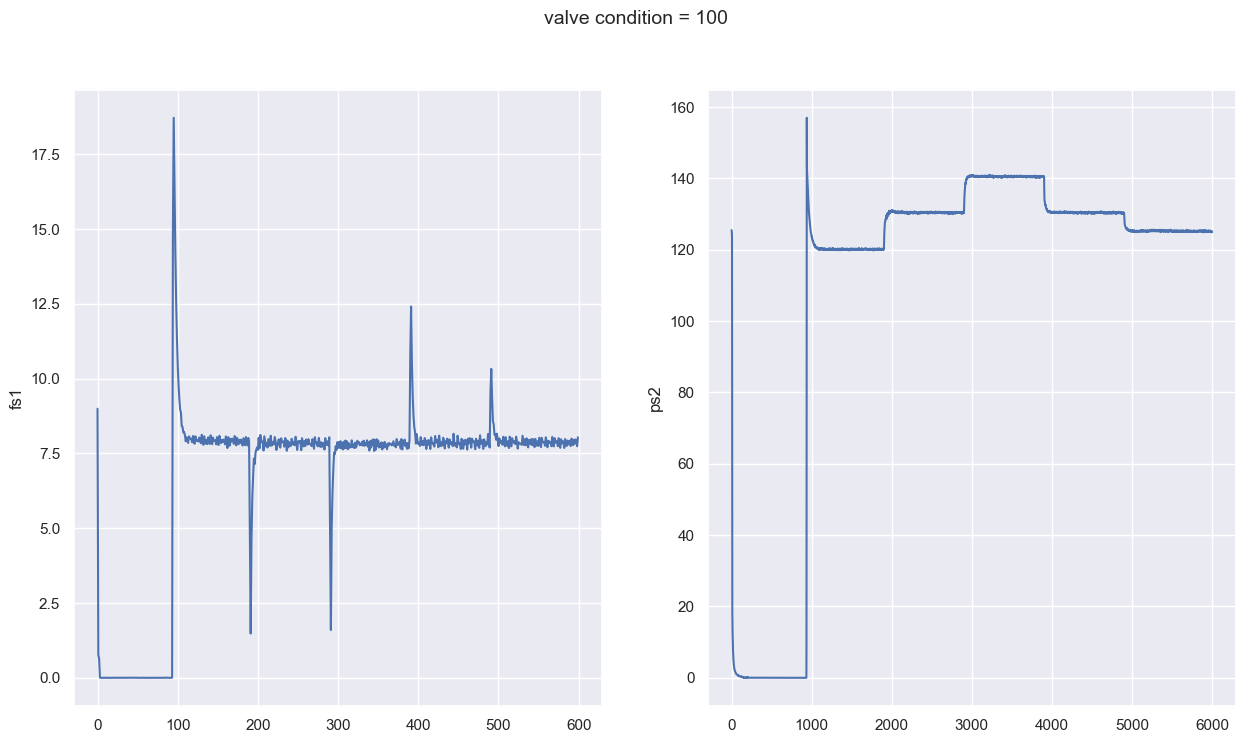

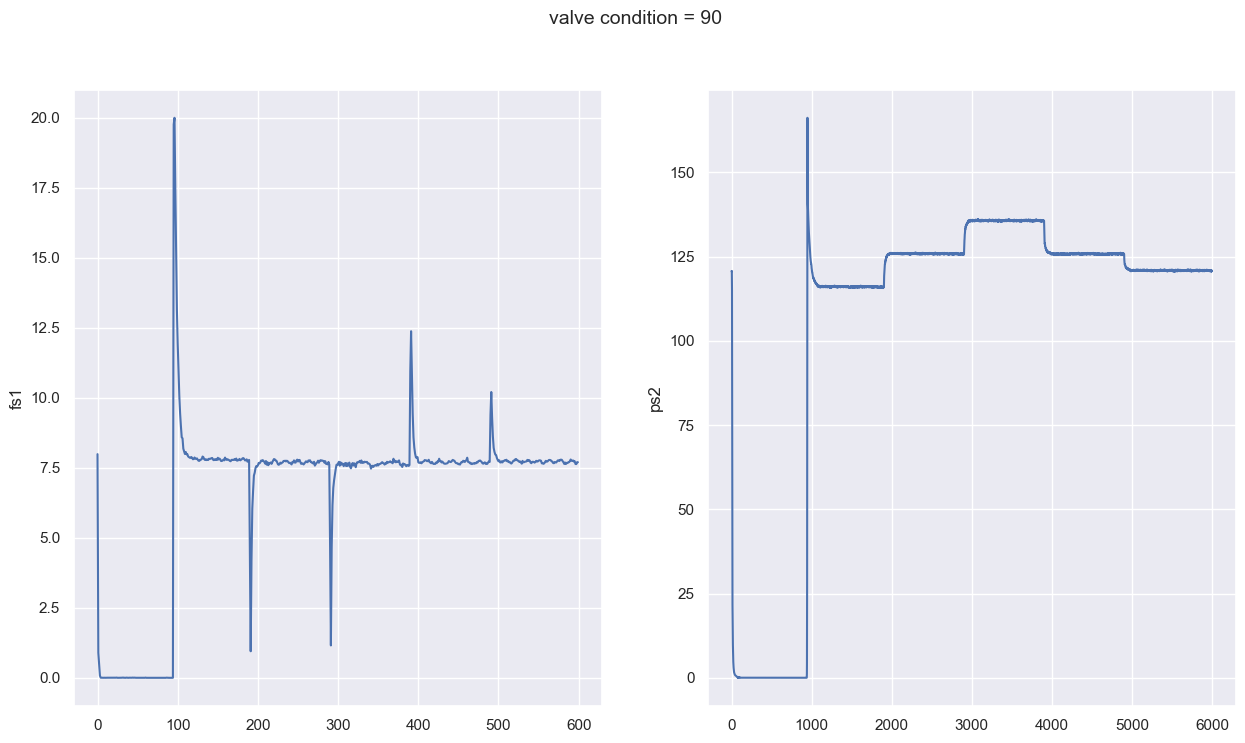

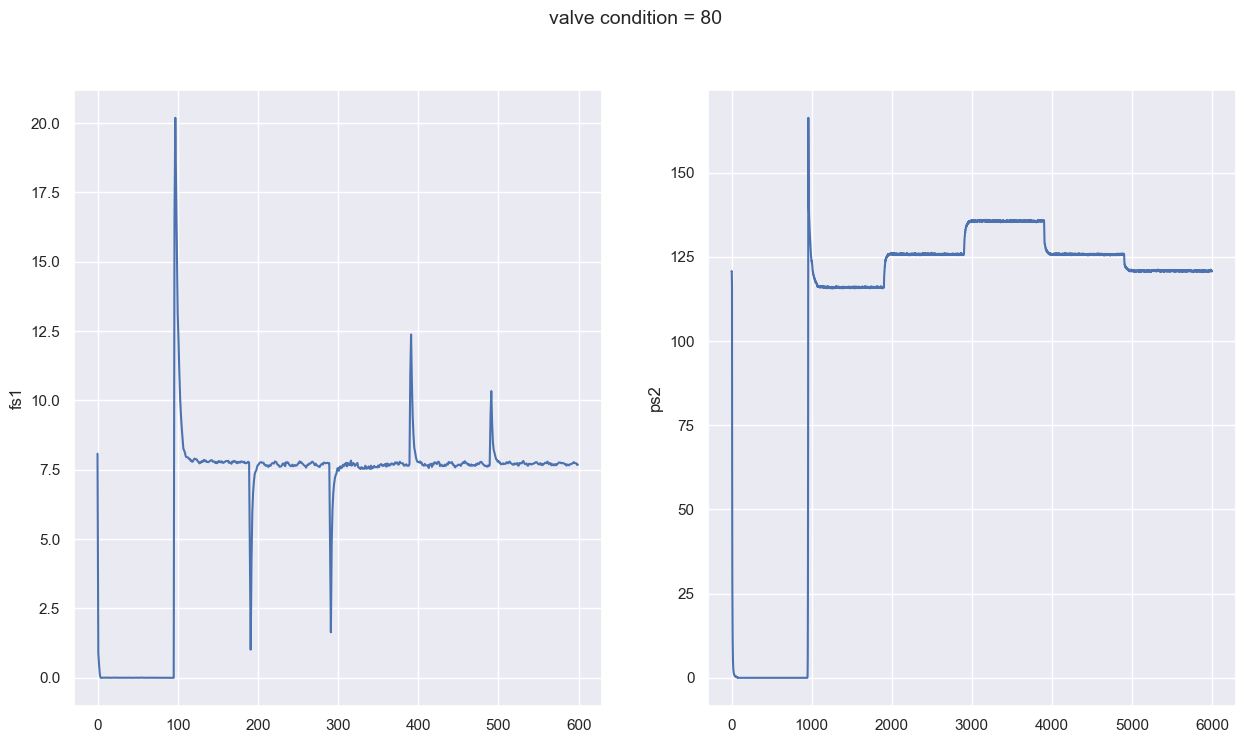

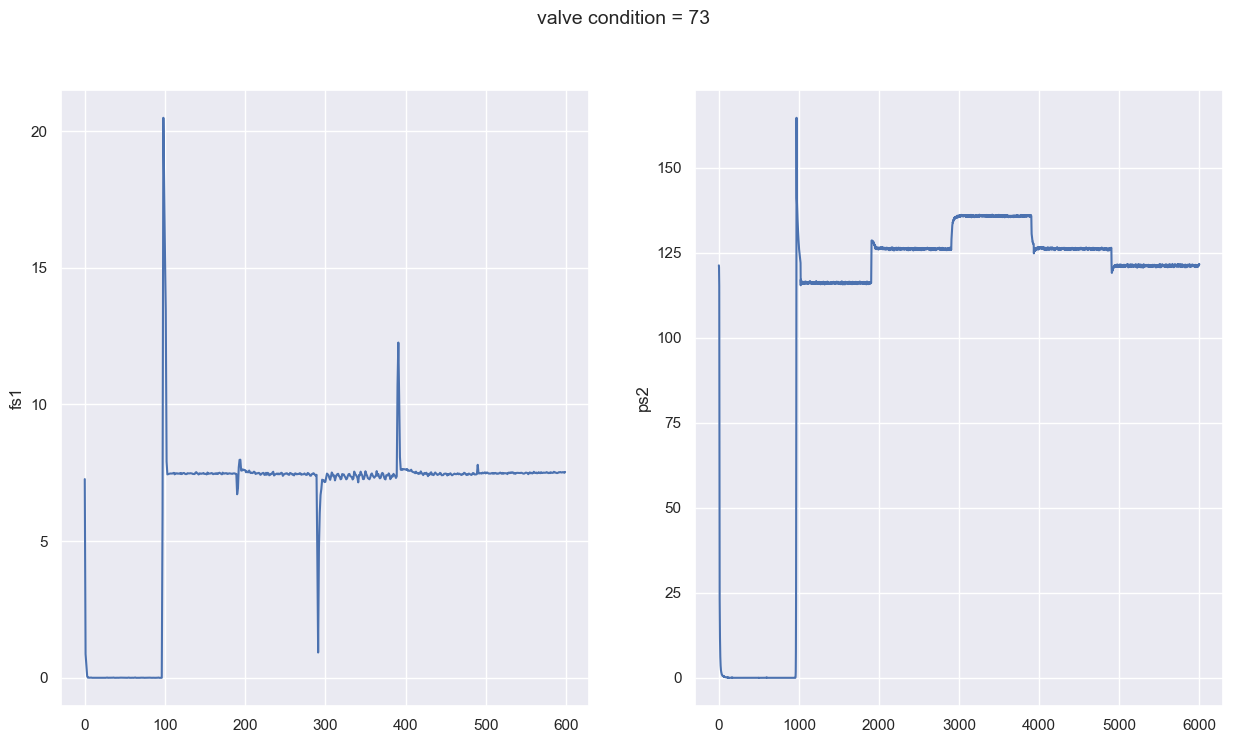

In [6]:
dfs = [fs1, ps2]
feature_names = ["fs1", "ps2"]

for profile_id in [0, 452, 443, 254]:
    figure, axes = plt.subplots(1, 2, figsize=(15, 8))
    figure.suptitle(f'valve condition = {valve_condition[profile_id]}', fontsize=14)

    for ax, df, feature_name in zip(axes, dfs, feature_names):
        ax.plot(df.loc[profile_id])
        ax.set_ylabel(feature_name)
    plt.show()

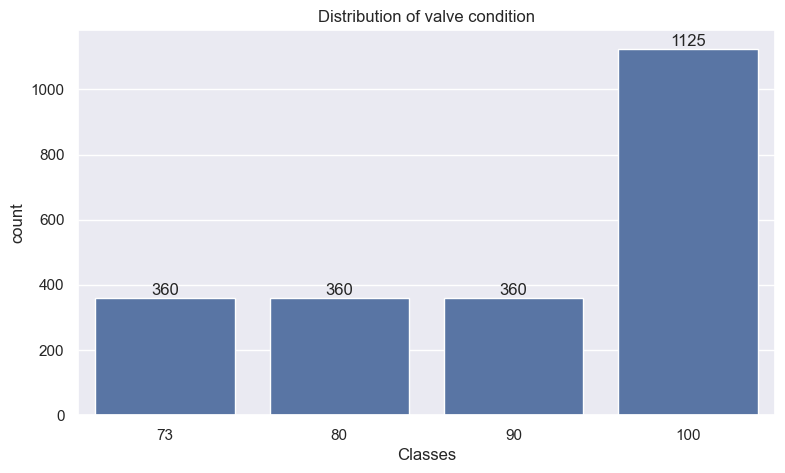

In [7]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(x=valve_condition)
ax.bar_label(ax.containers[0])
plt.title("Distribution of valve condition")
plt.xlabel("Classes")
plt.show()

# Preprocess data

In [8]:
# Encode y 
labels = {lab: i for i, lab in enumerate(np.sort(np.unique(valve_condition)))}
print("encoding mapping :", labels)
y = [labels[lab] for lab in valve_condition]

print(Counter(y))

encoding mapping : {73: 0, 80: 1, 90: 2, 100: 3}
Counter({3: 1125, 0: 360, 1: 360, 2: 360})


Since a cycle is about 60 seconds, I decide to keep only 60 values for each feature. From the plots, I can see that this method does not change the dynamics of the time series.

fs1 (2205, 60)
ps2 (2205, 60)


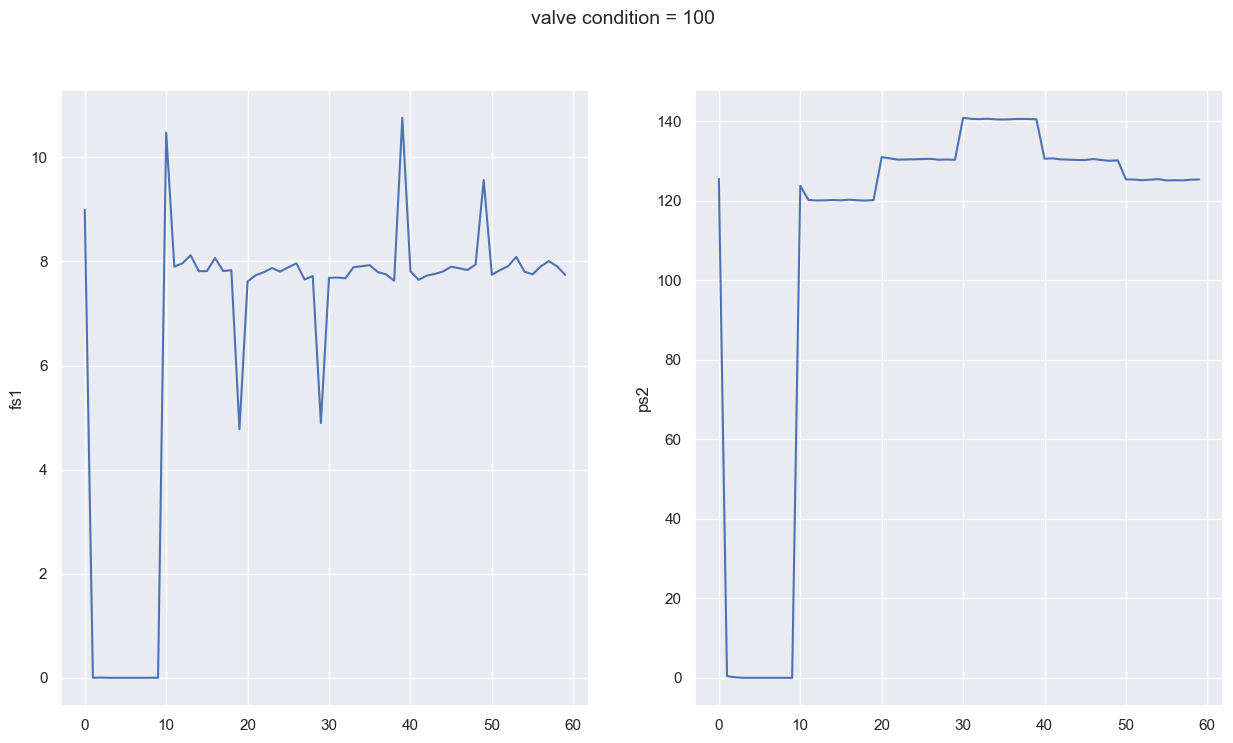

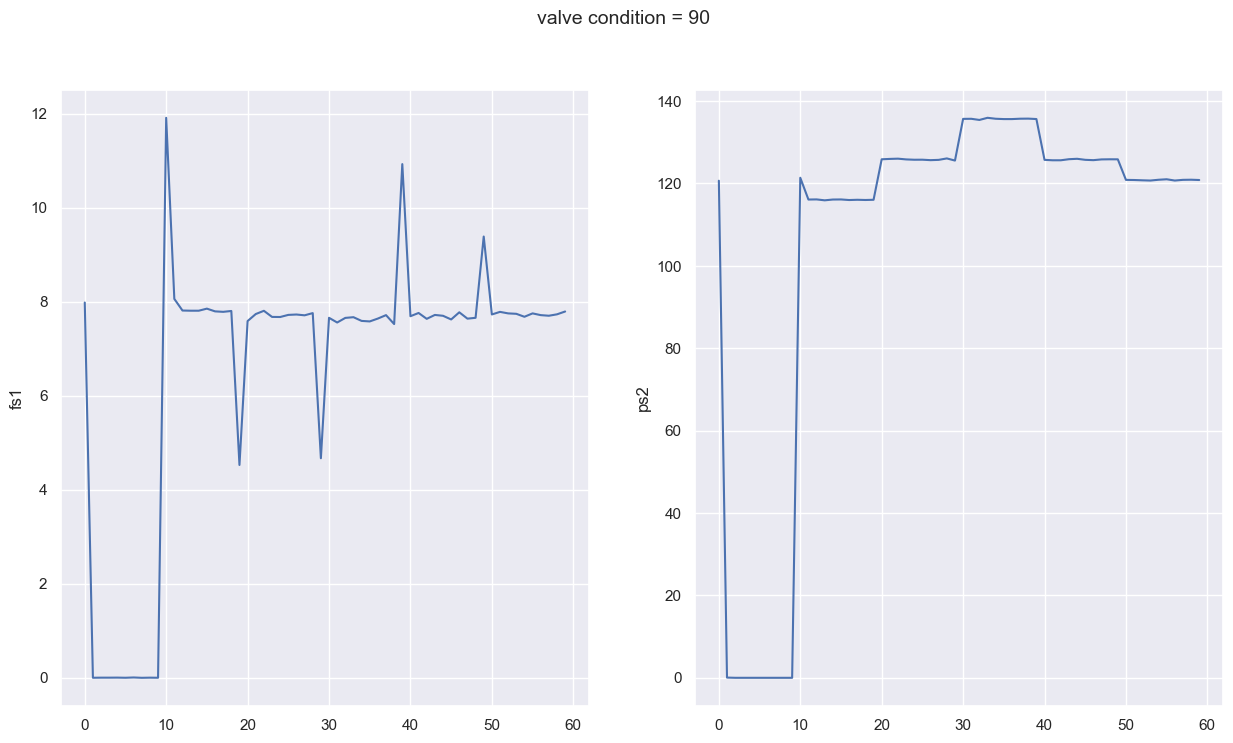

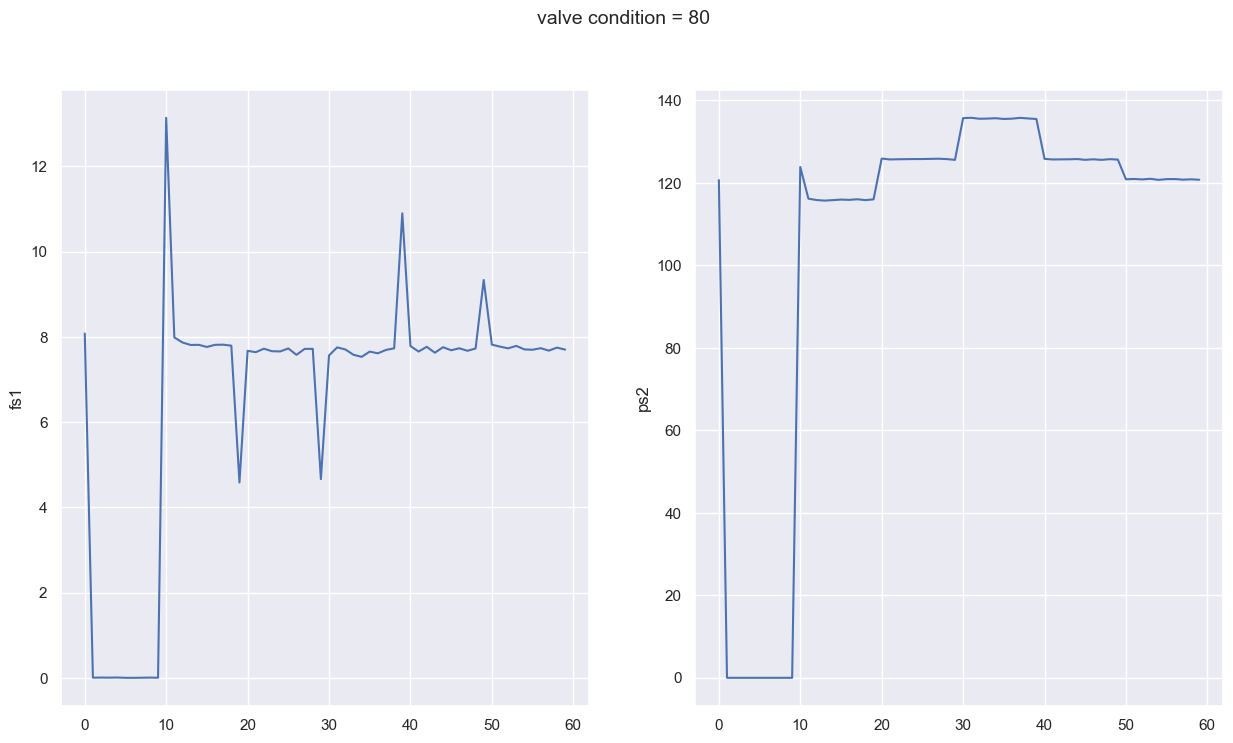

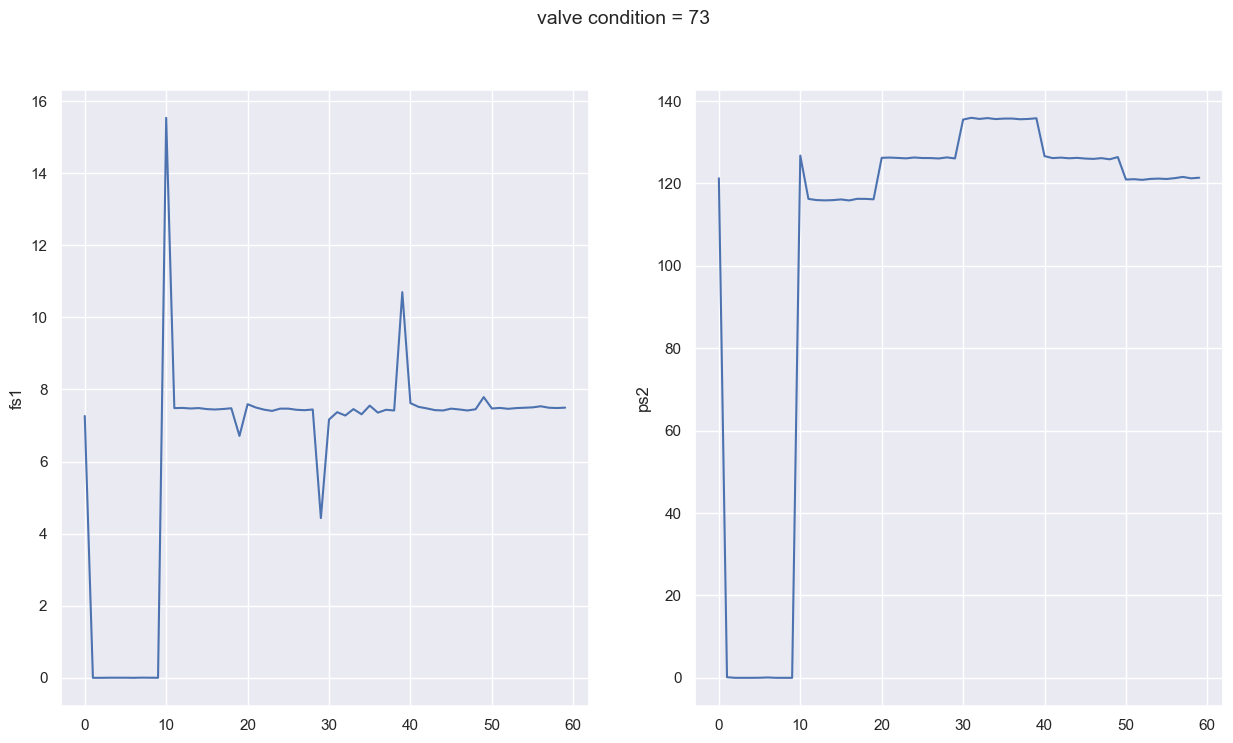

In [9]:
fs1 = fs1.to_numpy()[:,::10]
print(f'fs1 {fs1.shape}')

ps2 = ps2.to_numpy()[:,::100]
print(f'ps2 {ps2.shape}')

# Visualize samples to compare with preceding plots
arrays = [fs1, ps2]
feature_names = ["fs1", "ps2"]

for profile_id in [0, 452, 443, 254]:
    figure, axes = plt.subplots(1, 2, figsize=(15, 8))
    figure.suptitle(f'valve condition = {valve_condition[profile_id]}', fontsize=14)

    for ax, arr, feature_name in zip(axes, arrays, feature_names):
        ax.plot(arr[profile_id])
        ax.set_ylabel(feature_name)
    plt.show()

In [10]:
# Concatenate to create unique array for explanatory variables
x = np.concatenate([fs1, ps2], axis=1)
print(f"shape of x = {x.shape}")

shape of x = (2205, 120)


In [11]:
# Z-normalize each time series

def normalize(t):
    return (t - np.mean(t))/np.std(t)

x = np.array([normalize(t) for t in x])
print(x.shape, type(x[0]))
print(type(x))

(2205, 120) <class 'numpy.ndarray'>
<class 'numpy.ndarray'>


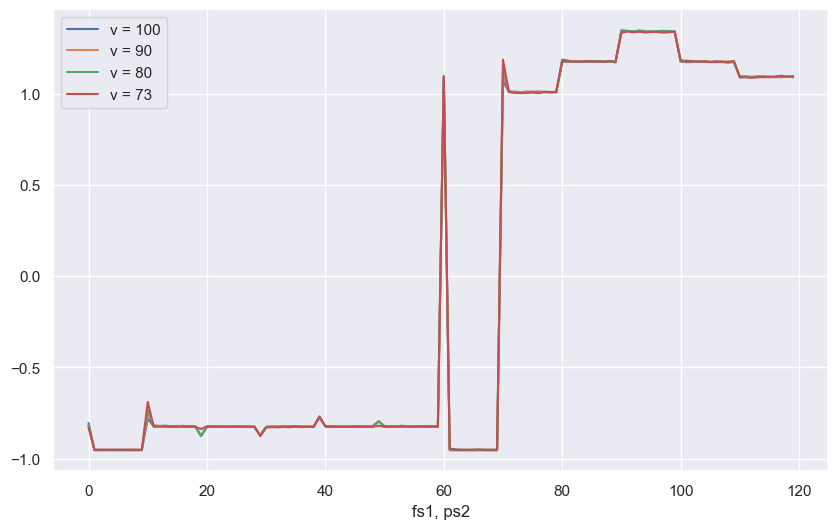

In [12]:
plt.figure(figsize=(10, 6))
for profile_id in [0, 452, 443, 254]:
    plt.plot(x[profile_id], label=f'v = {valve_condition[profile_id]}')
    plt.xlabel("fs1, ps2")
    plt.legend(loc="best")
plt.show()

In [13]:
# Split data into train and test data
nb_train_samples = 2000

x_train, y_train = x[:nb_train_samples], np.array(y[:nb_train_samples])
x_test, y_test = x[nb_train_samples:], np.array(y[nb_train_samples:])

print(f"train {x_train.shape}, {len(y_train)}")
print(f"test {x_test.shape}, {len(y_test)}")
print(f"y train counter = {dict(sorted(Counter(y_train).items()))}")
print(f"y test counter = {dict(sorted(Counter(y_test).items()))}")

train (2000, 120), 2000
test (205, 120), 205
y train counter = {0: 320, 1: 318, 2: 310, 3: 1052}
y test counter = {0: 40, 1: 42, 2: 50, 3: 73}


In [14]:
# Imbalanced data -> Over sampling other classes 
smote = SMOTE(random_state=4)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print(f"train after SMOTE {x_train_smote.shape}, {len(y_train_smote)}")

train after SMOTE (4208, 120), 4208


In [15]:
# save for future fittings and predictions
with open('x_train.npy', 'wb') as f:
    np.save(f, x_train_smote)
    
with open('y_train.npy', 'wb') as f:
    np.save(f, y_train_smote)

In [16]:
tmp = np.load("x_train.npy")
(tmp == x_train_smote).all()

True

# Modelisation: KNN + DTW

## Train model

I chose to use the <b>KNeighbors</b> classifier and <b>DTW</b> as a distance to compute the similarity between two time series. It is one of the most popular model for time series classification. For the choice of n_neighbors, I tested 3 values (1, 3, 5) and 3 gave the best results in terms of recall per class and global accuracy.

In [17]:
knn = KNeighborsTimeSeriesClassifier(n_neighbors=3, 
                                     metric="dtw", 
                                     weights="distance",
                                     verbose=1)
knn.fit(x_train_smote, y=y_train_smote)

KNeighborsTimeSeriesClassifier(n_neighbors=3, verbose=1, weights='distance')

In [18]:
knn.get_params()

{'metric': 'dtw',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'verbose': 1,
 'weights': 'distance'}

## Testing

In [19]:
start = time.time()
preds = knn.predict(x_test)
print(f"prediction time : {round((time.time() - start) / 60, 2)} min")

prediction time : 3.25 min


## Model performance

In [20]:
print(classification_report(list(y_test), list(preds)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.90      0.95        42
           2       0.88      0.56      0.68        50
           3       0.77      1.00      0.87        73

    accuracy                           0.87       205
   macro avg       0.91      0.87      0.88       205
weighted avg       0.89      0.87      0.87       205



## Confusion matrix

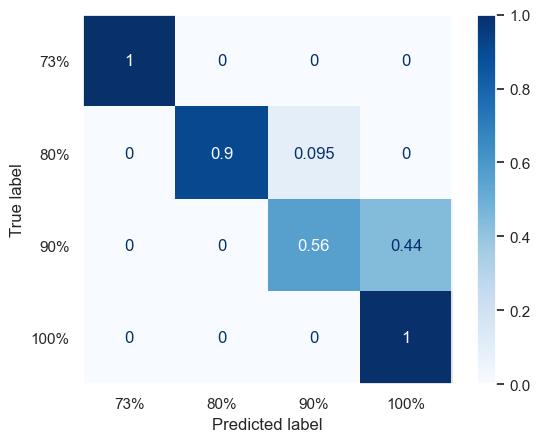

In [21]:
cm = confusion_matrix(y_test, preds, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=["73%", "80%", "90%", "100%"])
disp.plot(cmap="Blues")
plt.grid(False)
plt.show()

## Visualize test series with valve condition = 90%

In [22]:
small_lag_idxes = [idx for idx in range(len(y_test)) if y_test[idx] == 2]
wrong_idxes = [idx for idx in small_lag_idxes if y_test[idx] != preds[idx]]
right_idxes = [idx for idx in small_lag_idxes if idx not in wrong_idxes]

print("Indexes of misclassified samples", wrong_idxes)
print("Indexes of well classified samples", right_idxes)

Indexes of misclassified samples [7, 8, 46, 51, 94, 95, 96, 97, 99, 101, 135, 136, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185]
Indexes of well classified samples [2, 3, 4, 5, 6, 9, 10, 11, 43, 44, 45, 47, 48, 49, 50, 52, 98, 100, 102, 103, 137, 138, 139, 140, 141, 142, 143, 144]


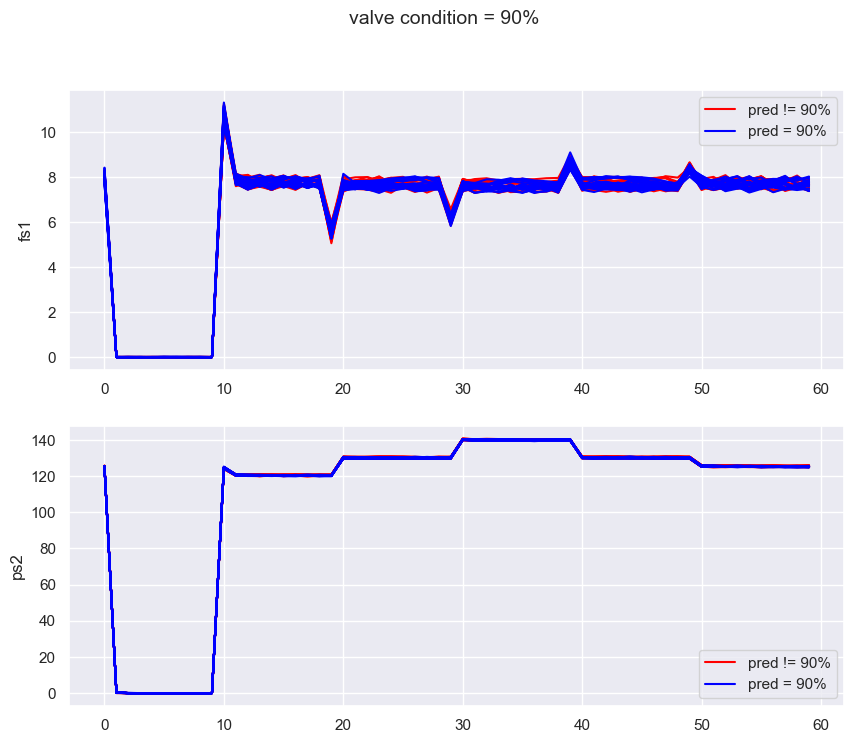

In [23]:
figure, axes = plt.subplots(2, 1, figsize=(10, 8))
figure.suptitle(f'valve condition = 90%', fontsize=14)

for ax, feat, feat_name in zip(axes, [fs1, ps2], ["fs1", "ps2"]):
    for idxes, lab, col in zip( 
                              [wrong_idxes, right_idxes], 
                              ["pred != 90%", "pred = 90%"], 
                             ["red", "blue"]):
        for profile_id in idxes[:-1]:
            ax.plot(feat[nb_train_samples + profile_id], color=col)
        ax.plot(feat[nb_train_samples + idxes[-1]] , label=lab, color=col)
        ax.set_ylabel(feat_name)
        ax.legend(loc="best")
plt.show()

I do not see a significant difference between the time series with wrong/right predictions. Maybe the model has the same difficulty as humans afterall ...

## Save model 

In [24]:
save_path = "nn3_valve_model.pkl"
knn.to_pickle(save_path)

In [25]:
# Test if saved model works fine 
clf = KNeighborsTimeSeriesClassifier.from_pickle(save_path)
clf.get_params()
clf.fit(x_train_smote, y=y_train_smote)

start = time.time()
clf_preds = clf.predict(x_test)
print(f"prediction time : {round((time.time() - start) / 60, 2)} min")

(preds == clf_preds).all()

prediction time : 3.03 min


True

# Conclusion

To classify the time series representing the valve condition, I chose to present this model because of its trade-off <b>simplicity / accuracy </b>.<br> The model works <b>perfectly</b>, at least on the test dataset, when it comes to predict if the utilization of the valve is <b>close to total failure</b>.<br> It seems that it is harder for the model to recognize <b>small lag</b> condition. <br>Applying a <b>z-norm</b> on each time series before performing the classification improves the result. <br><br> For future works, I will explore the use of feature engineering combined with ensemble of trees.